# Taller 3: Analisis de Dataset

## Analisis del dataset de: Ataques a la ciberseguridad

### Objetivos
- 

In [14]:
# Importar libreria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [15]:
df = pd.read_csv('cybersecurity_attacks.csv')
print(f"Dataset cargado exitosamente: {df.shape[0]} filas, {df.shape[1]} columnas\n")


Dataset cargado exitosamente: 40000 filas, 25 columnas



In [16]:
df.head()


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  object        
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  object        
 8   Traffic Type            40000 non-null  object        
 9   Payload Data            40000 non-null  object        
 10  Malware Indicators      40000 non-null  object        
 11  Anomaly Scores          40000 non-null  float64       
 12  Alerts/Warnings         40000 non-null  object

In [18]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [19]:
print("1. LIMPIEZA DE LA BASE DE DATOS")
print("="*50)

# Información general del dataset
print("Información general del dataset:")
print(df.info())
print(f"\nDimensiones: {df.shape}")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Análisis de valores faltantes
print("\n1.1 Análisis de valores faltantes:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Porcentaje', ascending=False)

print(missing_df[missing_df['Valores_Faltantes'] > 0])

# Análisis de duplicados
print(f"\n1.2 Registros duplicados: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("Eliminando duplicados...")
    df = df.drop_duplicates()
    print(f"Dataset después de eliminar duplicados: {df.shape}")

# Limpieza de datos específicos
print("\n1.3 Limpieza de datos específicos:")

# Convertir Timestamp a datetime si existe
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    print(f"Timestamp convertido a datetime. Valores inválidos: {df['Timestamp'].isnull().sum()}")

# Limpiar columnas numéricas
numeric_columns = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"{col}: {df[col].isnull().sum()} valores convertidos a NaN")

# Imputación de valores faltantes
print("\n1.4 Tratamiento de valores faltantes:")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            # Para variables numéricas, usar mediana
            df[col].fillna(df[col].median(), inplace=True)
            print(f"{col}: Imputado con mediana")
        else:
            # Para variables categóricas, usar moda o 'Unknown'
            if df[col].mode().empty:
                df[col].fillna('Unknown', inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"{col}: Imputado con moda o 'Unknown'")

print(f"\nDataset limpio final: {df.shape}")


1. LIMPIEZA DE LA BASE DE DATOS
Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40

/var/folders/s7/gs4k992s6_v4lcg1dgy22fk40000gn/T/ipykernel_41389/1814945363.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [70]:
# TRANSFORMACION DE DATOS
if 'Timestamp' in df.columns and not df['Timestamp'].isnull().all():
    df['Year'] = df['Timestamp'].dt.year
    df['Month'] = df['Timestamp'].dt.month
    df['Day'] = df['Timestamp'].dt.day
    df['Hour'] = df['Timestamp'].dt.hour
    df['DayOfWeek'] = df['Timestamp'].dt.dayofweek  # 0=Lunes, 6=Domingo
    print("Variables temporales creadas: Year, Month, Day, Hour, DayOfWeek")
    
# Crear variable numérica a partir de Action Taken
if 'Action Taken' in df.columns:
    # Mapear las acciones a valores numéricos según su nivel de severidad
    action_mapping = {
        'Ignored': 0,
        'Logged': 1,
        'Blocked': 2,
        'Quarantined': 3,
        'Terminated': 4
    }
    df['Action Taken Numeric'] = df['Action Taken'].map(action_mapping)
    
    # Para valores no mapeados, asignar un valor por defecto
    df['Action Taken Numeric'].fillna(0, inplace=True)
    
    print("Variable numérica creada: Action Taken Numeric")
    print(f"Distribución de Action Taken Numeric:")
    print(df['Action Taken Numeric'].value_counts().sort_index())

if 'Packet Length' in df.columns:
    df['Packet_Size_Category'] = pd.cut(df['Packet Length'], 
                                       bins=[0, 500, 1000, 1500, float('inf')], 
                                       labels=['Small', 'Medium', 'Large', 'XLarge'])
    print("Categoría de tamaño de paquete creada: Packet_Size_Category")
    
print(f"Dataset con nuevas variables: {df.shape}")


Variables temporales creadas: Year, Month, Day, Hour, DayOfWeek
Variable numérica creada: Action Taken Numeric
Distribución de Action Taken Numeric:
Action Taken Numeric
0    13276
1    13195
2    13529
Name: count, dtype: int64
Categoría de tamaño de paquete creada: Packet_Size_Category
Dataset con nuevas variables: (40000, 32)


/var/folders/s7/gs4k992s6_v4lcg1dgy22fk40000gn/T/ipykernel_41389/2878081630.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Action Taken Numeric'].fillna(0, inplace=True)


In [71]:
df.head()


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Firewall Logs,IDS/IPS Alerts,Log Source,Year,Month,Day,Hour,DayOfWeek,Packet_Size_Category,Action Taken Numeric
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Log Data,Alert Data,Server,2023,5,30,6,1,Medium,1
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Log Data,Alert Data,Firewall,2020,8,26,7,2,Large,2
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Log Data,Alert Data,Firewall,2022,11,13,8,6,Small,0
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Log Data,Alert Data,Firewall,2023,7,2,10,6,Small,2
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Log Data,Alert Data,Firewall,2023,7,16,13,6,Large,2


## ANÁLISIS EXPLORATORIO INICIAL

In [22]:
# Estadisticas descriptivas
print("\nEstadísticas descriptivas:")
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
if numeric_vars:
    print("Estadísticas descriptivas para variables numéricas:")
    desc_stats = df[numeric_vars].describe()
    print(desc_stats.round(2))



Estadísticas descriptivas:
Estadísticas descriptivas para variables numéricas:
       Source Port  Destination Port  Packet Length  Anomaly Scores      Year  \
count     40000.00          40000.00       40000.00        40000.00  40000.00   
mean      32970.36          33150.87         781.45           50.11   2021.41   
std       18560.43          18574.67         416.04           28.85      1.09   
min        1027.00           1024.00          64.00            0.00   2020.00   
25%       16850.75          17094.75         420.00           25.15   2020.00   
50%       32856.00          33004.50         782.00           50.34   2021.00   
75%       48928.25          49287.00        1143.00           75.03   2022.00   
max       65530.00          65535.00        1500.00          100.00   2023.00   

          Month       Day      Hour  DayOfWeek  
count  40000.00  40000.00  40000.00    40000.0  
mean       6.29     15.63     11.51        3.0  
std        3.33      8.77      6.92        

In [23]:
# Variables categoricas
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluir direcciones IP que tienen demasiadas categorías únicas
columns_to_exclude = ['Source IP Address', 'Destination IP Address']
categorical_vars = [col for col in categorical_vars if col not in columns_to_exclude]
if categorical_vars:
    print(f"\n\nVariables categóricas encontradas: {len(categorical_vars)}")
    for col in categorical_vars[:10]:  # Mostrar solo las primeras 10
        print(f"\n{col}:")
        value_counts = df[col].value_counts()
        print(value_counts.head())
        if len(value_counts) > 5:
            print(f"... y {len(value_counts) - 5} categorías más")




Variables categóricas encontradas: 19

Protocol:
Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

Packet Type:
Packet Type
Control    20237
Data       19763
Name: count, dtype: int64

Traffic Type:
Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

Payload Data:
Payload Data
Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.    1
Doloremque at doloribus ipsam consequatur molestias placeat. Cumque minima vero numquam recusandae eos. In perspiciatis sed et iusto optio voluptatum.                    1
Ipsa at alias provident doloremque. Labore assumenda sint nam aliquid aperiam. Odio perspiciatis sed vel.                                                                 1
Doloribus accusantium quae veniam laboriosam. Reprehenderit ullam ullam vel vero repudiandae nesciunt officia. Accusantium consequatur alias porro

## ANÁLISIS UNIVARIADO

numeric_columns Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores'], dtype='object')


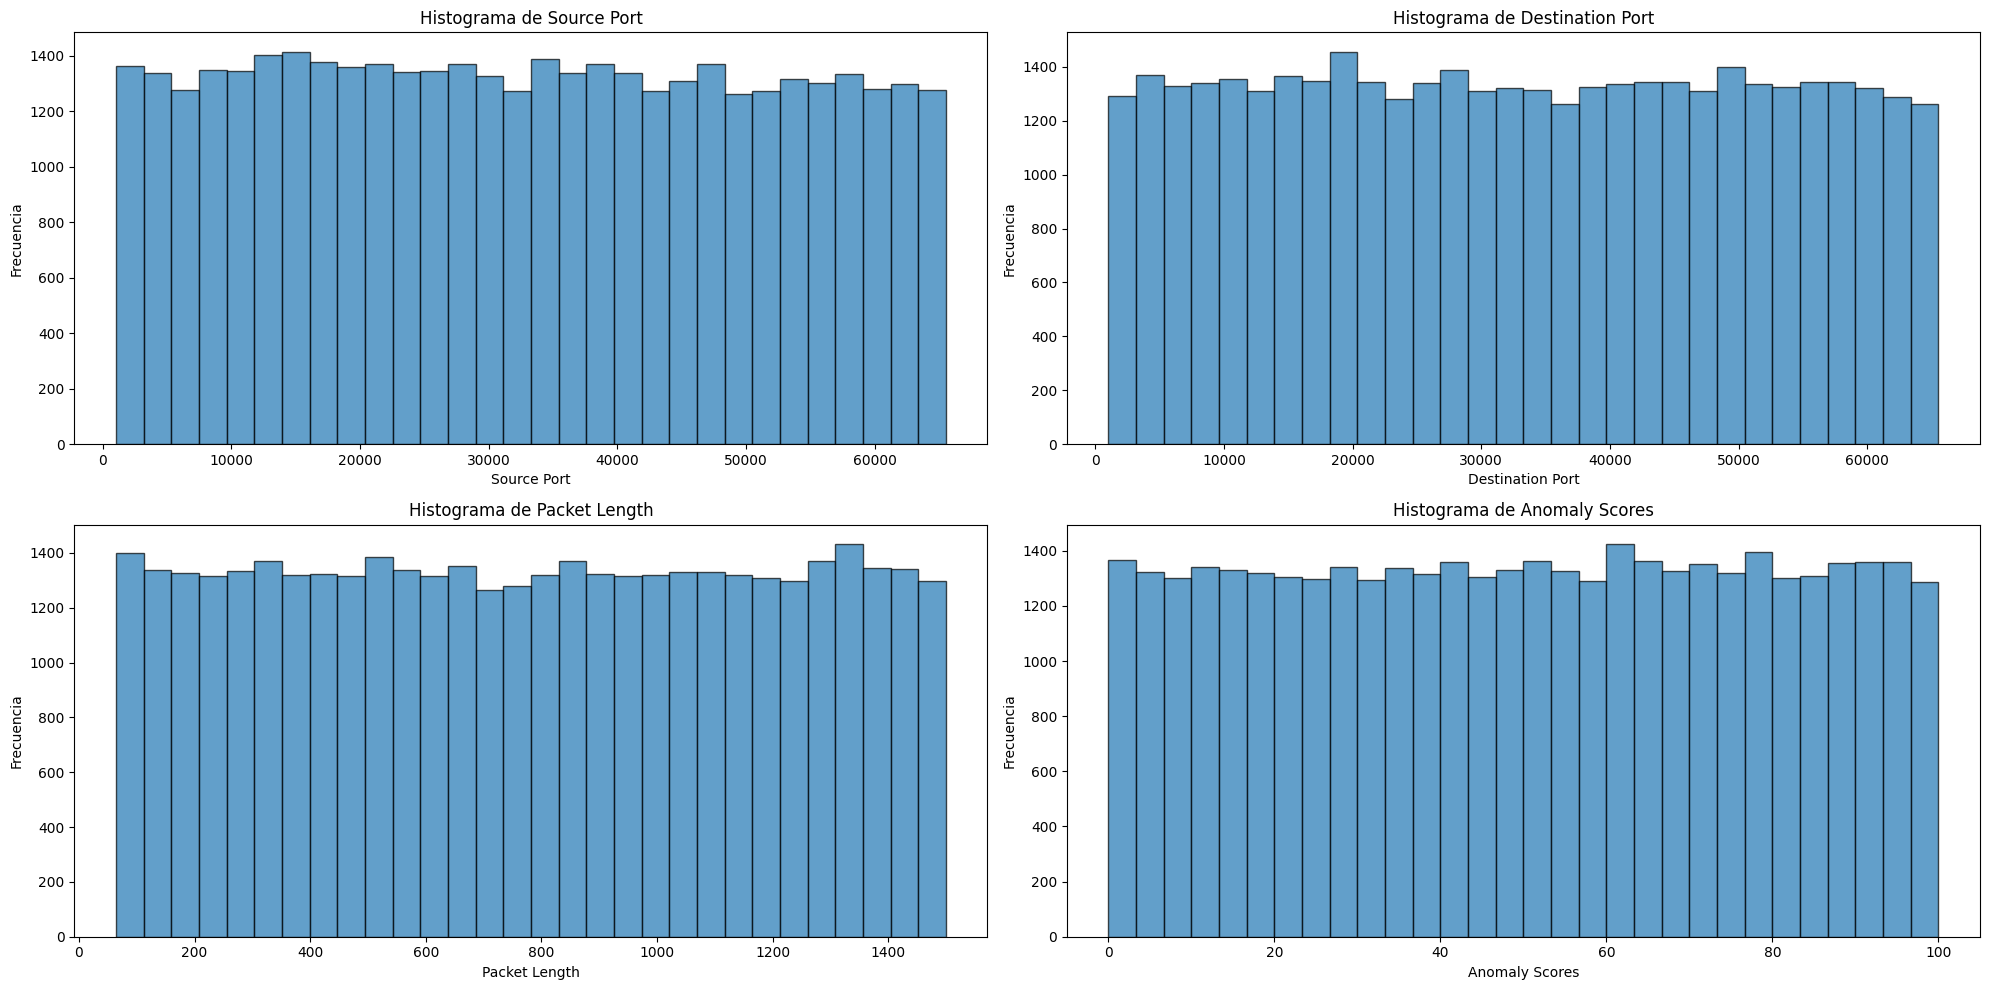

In [56]:
# Crear visualizaciones
fig_count = 1
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
print("numeric_columns", numeric_columns)
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor="black")
    axes[i].set_title(f"Histograma de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

# Ocultar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

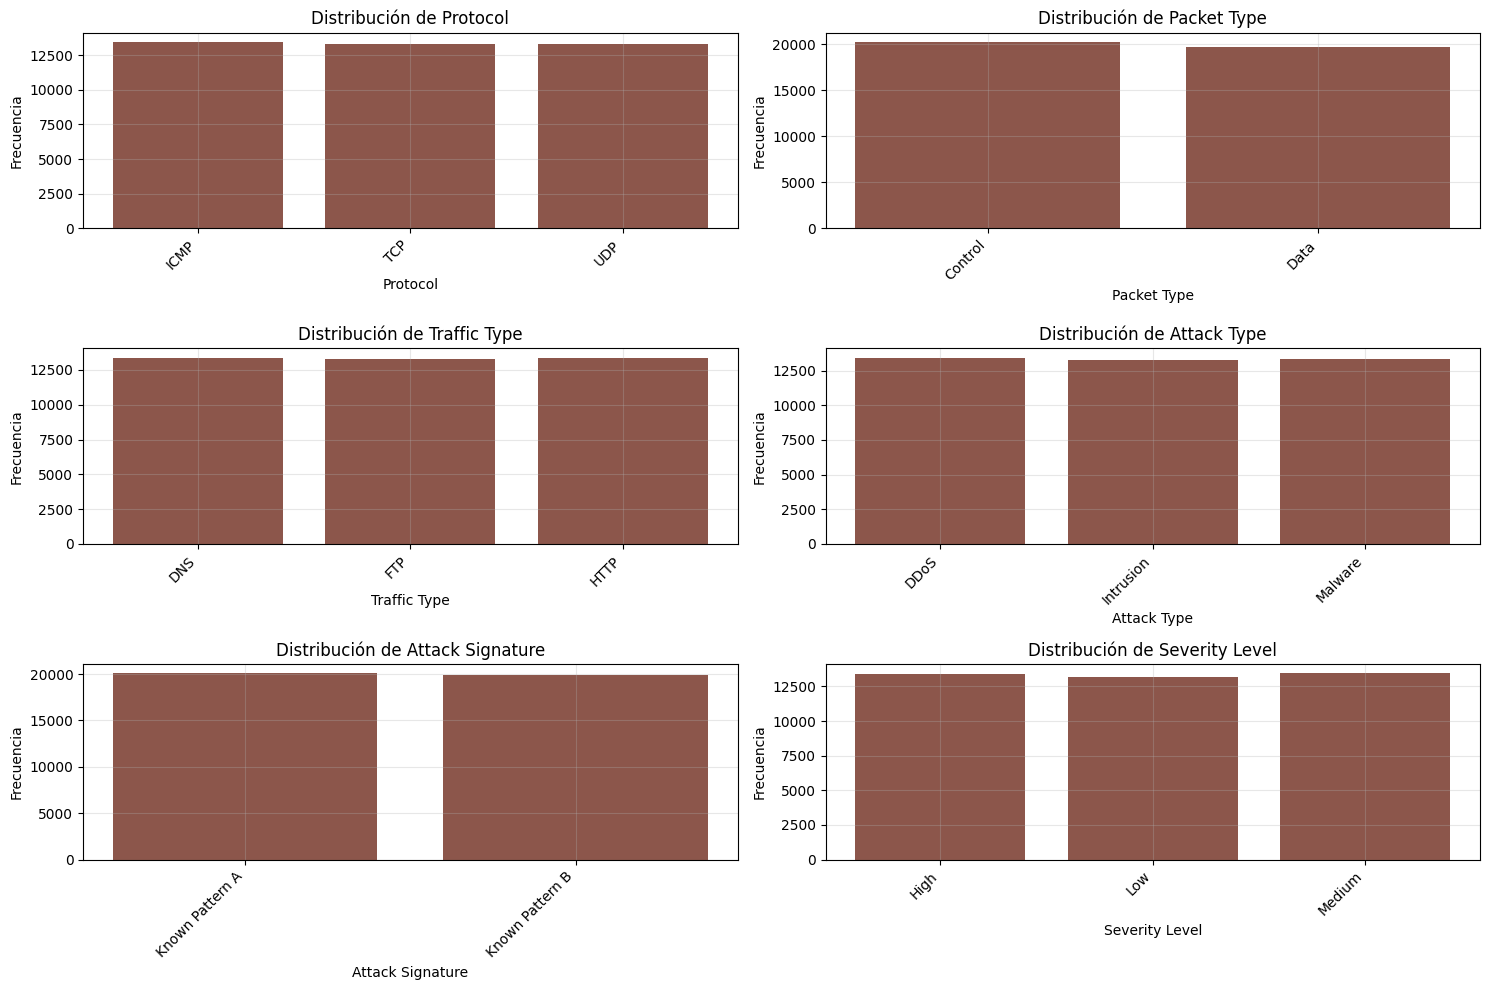

In [57]:
key_categorical = [
    "Protocol",
    "Packet Type",
    "Traffic Type",
    "Attack Type",
    "Attack Signature",
    "Severity Level",
]
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()


for col in key_categorical:
    # print(col)
    for i, col in enumerate(key_categorical):
        axes[i].bar(
            df.groupby(df[col].dropna()).size().index,
            df.groupby(df[col].dropna()).size().values,
        )
        axes[i].set_title(f"Distribución de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].set_xticks(range(len(df.groupby(df[col]).size().index)))
        axes[i].set_xticklabels(
            df.groupby(df[col]).size().index, rotation=45, ha="right"
        )
        axes[i].grid(True, alpha=0.3)


plt.tight_layout()
plt.savefig(f"univariate_categorical_{fig_count}.png", dpi=300, bbox_inches="tight")
plt.show()

numeric_columns Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores'], dtype='object')


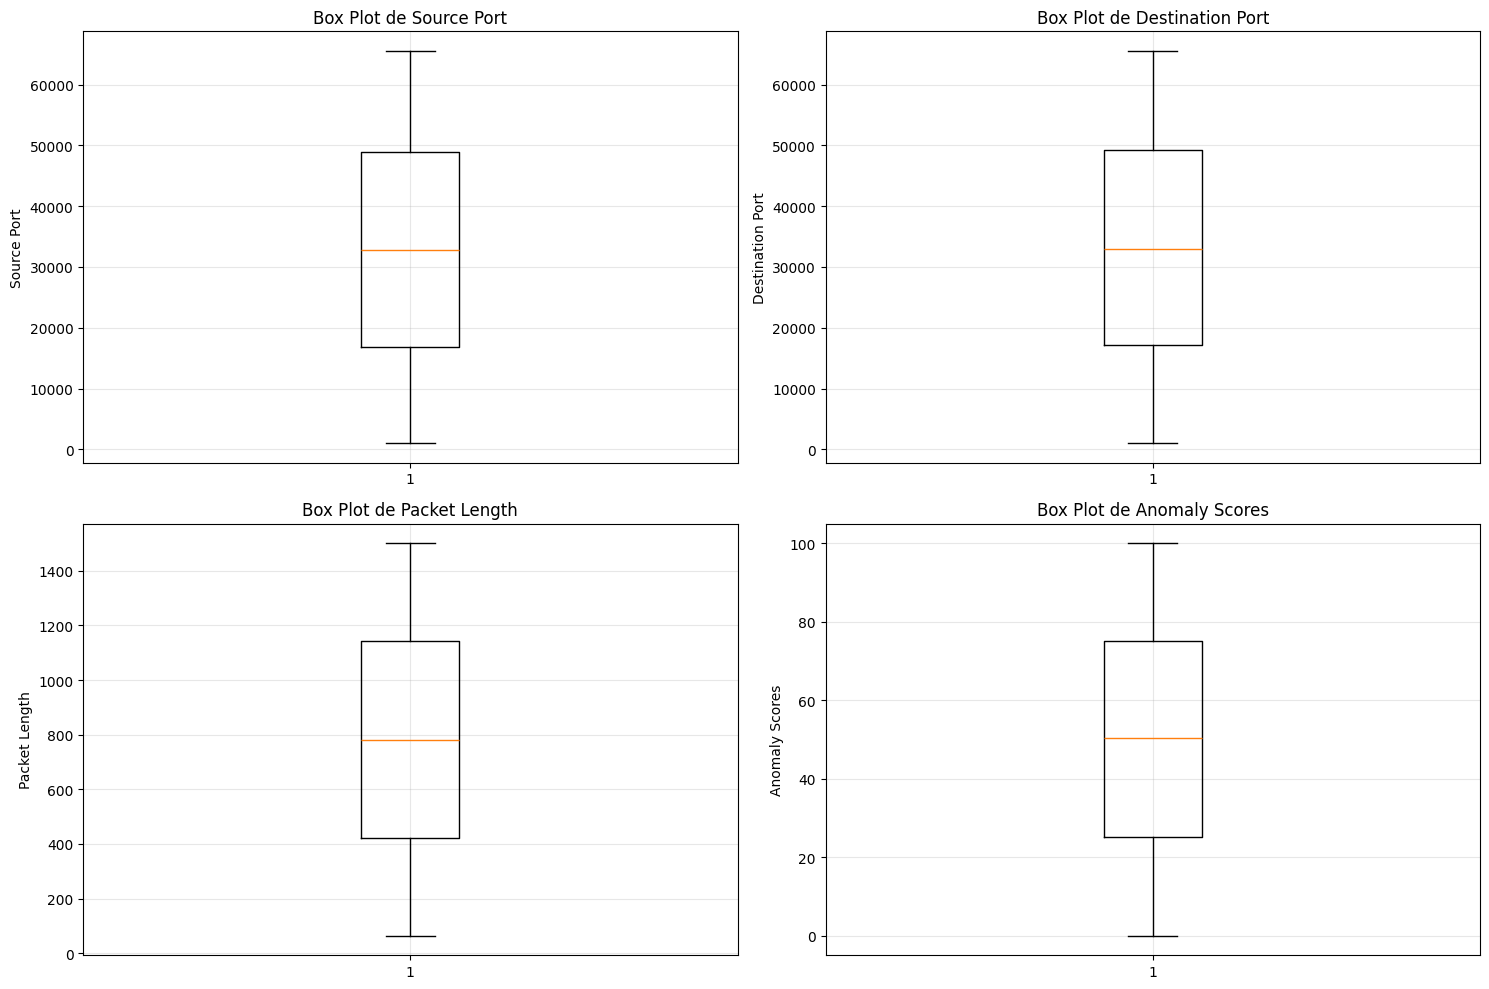

In [64]:
# Box plots para detectar outliers
print("numeric_columns", numeric_columns)
# if numeric_columns:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    if i < 4:
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(f'Box Plot de {col}')
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)


plt.tight_layout()
plt.savefig(f'boxplots_{fig_count}.png', dpi=300, bbox_inches='tight')
plt.show()
fig_count += 1

## ANÁLISIS BIVARIADO

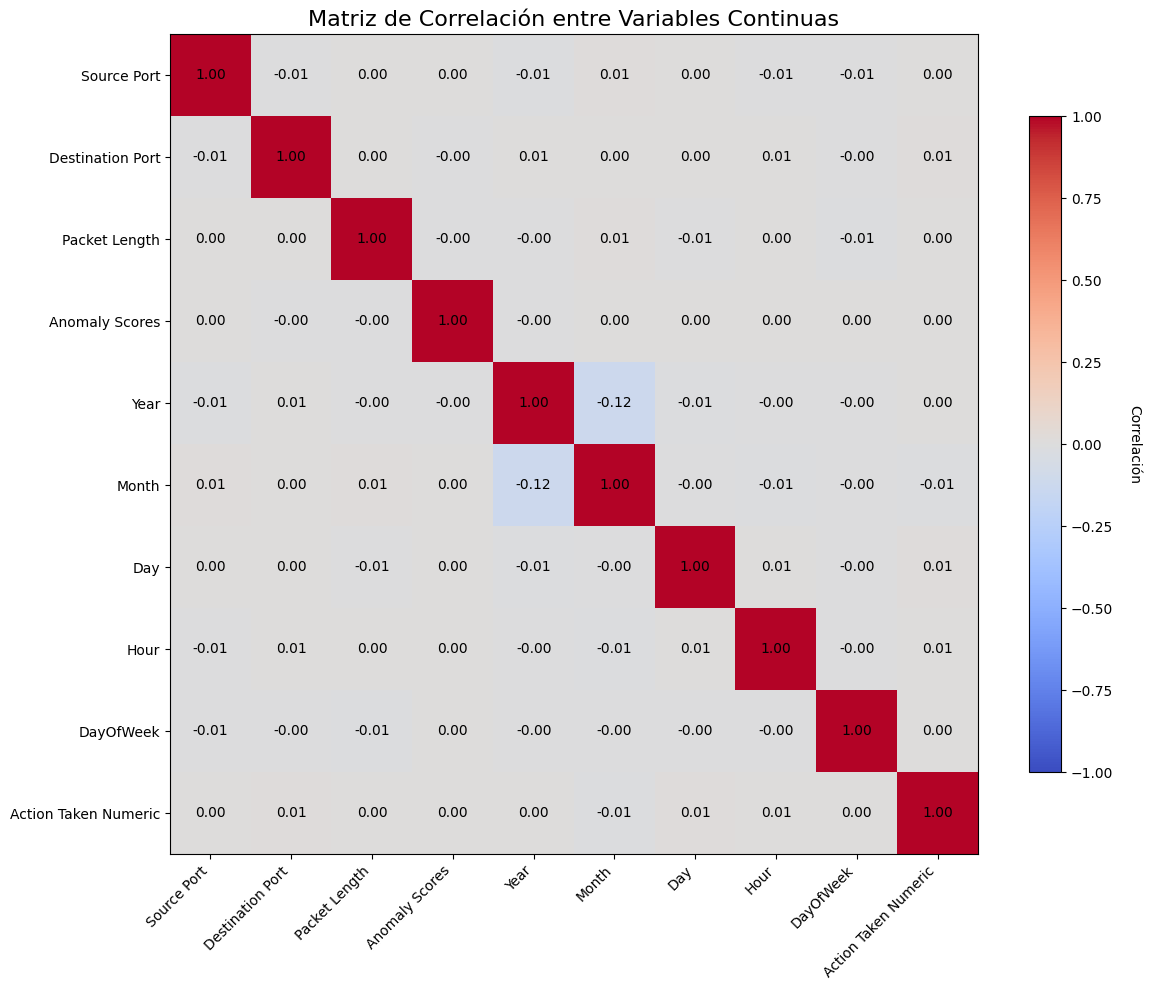


=== Correlaciones con Action Taken ===
Action Taken Numeric    1.000000
Month                  -0.010766
Destination Port        0.010459
Day                     0.009574
Hour                    0.006037
Source Port             0.003962
Year                    0.003572
Anomaly Scores          0.003033
Packet Length           0.002441
DayOfWeek               0.002012
Name: Action Taken Numeric, dtype: float64


In [73]:
numeric_data = df.select_dtypes(include=[np.number])

# Calcular matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear heatmap de correlaciones usando matplotlib
fig, ax = plt.subplots(figsize=(12, 10))

# Crear el mapa de calor
im = ax.imshow(correlation_matrix, cmap="coolwarm", aspect="auto", vmin=-1, vmax=1)

# Configurar etiquetas de los ejes
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(correlation_matrix.columns)

# Añadir valores de correlación en cada celda
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(
            j,
            i,
            f"{correlation_matrix.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
        )

# Añadir barra de colores
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label("Correlación", rotation=270, labelpad=20)

plt.title("Matriz de Correlación entre Variables Continuas", fontsize=16)
plt.tight_layout()
plt.show()

# Mostrar las correlaciones más fuertes con exam_score
print("\n=== Correlaciones con Action Taken ===")
action_taken_correlations = correlation_matrix["Action Taken Numeric"].sort_values(
    key=abs, ascending=False
)
print(action_taken_correlations)

## ANÁLISIS Y CONCLUSIONES

In [75]:
print("ANÁLISIS Y CONCLUSIONES")

print("VARIABLES MÁS DETERMINANTES EN CIBERATAQUES:")

# Análisis de importancia de variables
print("\nBasado en el análisis exploratorio:")

# Correlaciones más fuertes con anomaly scores
if 'Anomaly Scores' in df.columns and len(available_numeric) > 1:
    corr_with_anomaly = correlation_matrix['Anomaly Scores'].abs().sort_values(ascending=False)
    print(f"\nVariables más correlacionadas con Anomaly Scores:")
    for var, corr in corr_with_anomaly.items():
        if var != 'Anomaly Scores' and not np.isnan(corr):
            print(f"  - {var}: {corr:.3f}")

# Análisis de frecuencias de ataques
if 'Attack Type' in df.columns:
    print(f"\nTipos de ataques más frecuentes:")
    attack_freq = df['Attack Type'].value_counts()
    for attack, freq in attack_freq.head().items():
        print(f"  - {attack}: {freq} ({freq/len(df)*100:.1f}%)")

# Análisis de protocolos más atacados
if 'Protocol' in df.columns:
    print(f"\nProtocolos más utilizados en ataques:")
    protocol_attacks = df[df['Attack Type'].notna()]['Protocol'].value_counts()
    for protocol, freq in protocol_attacks.head().items():
        print(f"  - {protocol}: {freq} ataques")

ANÁLISIS Y CONCLUSIONES
VARIABLES MÁS DETERMINANTES EN CIBERATAQUES:

Basado en el análisis exploratorio:

Variables más correlacionadas con Anomaly Scores:
  - Source Port: 0.005
  - Destination Port: 0.004
  - Packet Length: 0.004

Tipos de ataques más frecuentes:
  - DDoS: 13428 (33.6%)
  - Malware: 13307 (33.3%)
  - Intrusion: 13265 (33.2%)

Protocolos más utilizados en ataques:
  - ICMP: 13429 ataques
  - UDP: 13299 ataques
  - TCP: 13272 ataques
